In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cols = ['sentiment','id','date','query_string','user','text']

In [8]:
df = pd.read_csv("../data/twitter_corpse/training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding = "ISO-8859-1")

In [13]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.groupby('sentiment').count()

,id,date,query_string,user,text
sentiment,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


In [11]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [15]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [17]:
df.head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [20]:
df[df.sentiment == 0].head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [23]:
df[df.sentiment == 4].head(5)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [26]:
df['senetry_check']=[len(t) for t in df.text]

In [27]:
df.head()

,sentiment,text,senetry_check
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [28]:
from pprint import pprint

In [30]:
data_dist = {
    'sentiment': {
        'type': df.sentiment.dtype,
        'discription': 'sentiment class: 0=nevative,1=positive'
    },
    'text': {
        'type': df.text.dtype,
        'discription': 'tweet text'
    },
    'senetry_check': {
        'type': df.senetry_check.dtype,
        'discription': 'tweet length'
    },
    'data_shape':df.shape
}

In [32]:
pprint(data_dist)

{'data_shape': (1600000, 3),
 'senetry_check': {'discription': 'tweet length', 'type': dtype('int64')},
 'sentiment': {'discription': 'sentiment class: 0=nevative,1=positive',
               'type': dtype('int64')},
 'text': {'discription': 'tweet text', 'type': dtype('O')}}


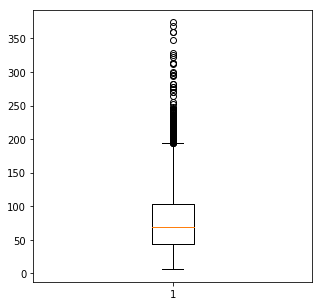

In [39]:
fig,ax =plt.subplots(figsize=(5,5))
plt.boxplot(df.senetry_check)
plt.show()